In [4]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
df = pd.read_csv('/content/Cleaned cancer.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Patient_ID  228 non-null    int64  
 1   inst        228 non-null    float64
 2   time        228 non-null    int64  
 3   status      228 non-null    int64  
 4   age         228 non-null    int64  
 5   sex         228 non-null    int64  
 6   ph.ecog     228 non-null    float64
 7   ph.karno    228 non-null    float64
 8   pat.karno   228 non-null    float64
 9   meal.cal    228 non-null    float64
 10  wt.loss     228 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 19.7 KB


In [8]:
df.head()

,Patient_ID,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.000000,9.831776
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.000000,15.000000
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,928.779006,15.000000
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.000000,11.000000
4,5,1.0,883,2,60,1,0.0,100.0,90.0,928.779006,0.000000


In [9]:
df.columns

Index(['Patient_ID', 'inst', 'time', 'status', 'age', 'sex', 'ph.ecog',
       'ph.karno', 'pat.karno', 'meal.cal', 'wt.loss'],
      dtype='object')

In [44]:
y= df['status']
X=df[[ 'inst', 'sex', 'ph.ecog', 'ph.karno', 'pat.karno', 'meal.cal', 'wt.loss']]


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [46]:
X_train

,inst,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
175,13.0,2,1.0,80.0,100.0,1025.000000,0.000000
11,16.0,2,2.0,70.0,70.0,928.779006,23.000000
212,15.0,1,1.0,90.0,70.0,1075.000000,0.000000
192,12.0,1,1.0,90.0,80.0,513.000000,9.831776
145,26.0,2,1.0,90.0,90.0,928.779006,2.000000
...,...,...,...,...,...,...,...
184,12.0,2,0.0,90.0,80.0,1225.000000,0.000000
165,16.0,2,0.0,90.0,90.0,1075.000000,3.000000
7,11.0,2,2.0,60.0,80.0,538.000000,1.000000
219,2.0,2,0.0,80.0,80.0,725.000000,11.000000


In [47]:
X_test

,inst,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
152,5.0,2,0.0,90.000000,90.0,928.779006,0.000000
118,16.0,1,2.0,70.000000,60.0,613.000000,24.000000
35,1.0,2,2.0,50.000000,50.0,1025.000000,9.831776
37,15.0,2,1.0,70.000000,90.0,875.000000,4.000000
160,32.0,2,0.0,90.000000,90.0,588.000000,8.000000
130,4.0,2,1.0,80.000000,80.0,925.000000,52.000000
189,22.0,1,0.0,90.000000,90.0,1225.000000,8.000000
201,22.0,1,1.0,60.000000,60.0,2200.000000,5.000000
113,3.0,2,0.0,90.000000,100.0,928.779006,1.000000
62,21.0,1,1.0,80.000000,100.0,1025.000000,9.831776


In [48]:
from sklearn.svm import SVC,SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report

In [49]:
clflinear = SVC(kernel='linear', C=1.0, probability=True)

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clflinear.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True)

In [51]:
print(y_train.value_counts())

2    121
1     50
Name: status, dtype: int64


In [52]:
# Print training set accuracy
print("Training Set Accuracy:", clflinear.score(X_train, y_train))

# Confusion matrix on the training set
y_pred_train = clflinear.predict(X_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix - Training Set:")
print(conf_matrix_train)

Training Set Accuracy: 0.7076023391812866
Confusion Matrix - Training Set:
[[  0  50]
 [  0 121]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


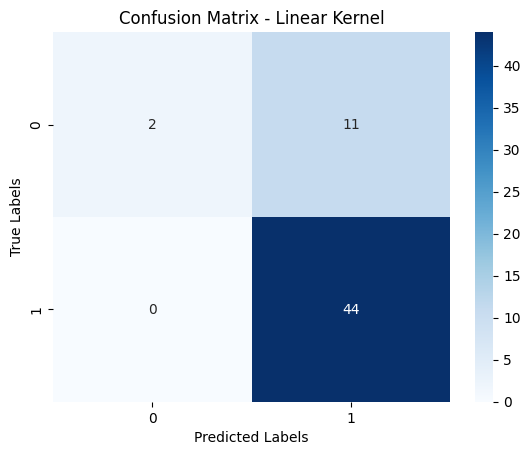



              precision    recall  f1-score   support

           1       1.00      0.15      0.27        13
           2       0.80      1.00      0.89        44

    accuracy                           0.81        57
   macro avg       0.90      0.58      0.58        57
weighted avg       0.85      0.81      0.75        57



In [19]:
clflinear = SVC(kernel='linear',C=10, probability=True)
clflinear.fit(X_train, y_train)
y_pred_linear = clflinear.predict(X_test)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(conf_matrix_linear, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Linear Kernel")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('\n')
print(classification_report(y_test, y_pred_linear))
importances = clflinear.coef_

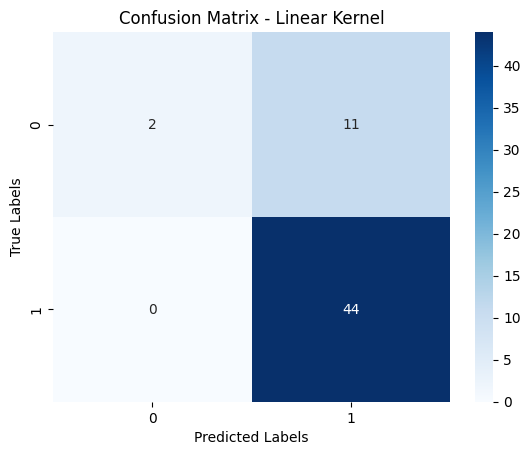



              precision    recall  f1-score   support

           1       1.00      0.15      0.27        13
           2       0.80      1.00      0.89        44

    accuracy                           0.81        57
   macro avg       0.90      0.58      0.58        57
weighted avg       0.85      0.81      0.75        57



In [22]:
clflinear = SVC(kernel='linear',C=20, probability=True)
clflinear.fit(X_train, y_train)
y_pred_linear = clflinear.predict(X_test)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(conf_matrix_linear, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Linear Kernel")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('\n')
print(classification_report(y_test, y_pred_linear))
importances = clflinear.coef_

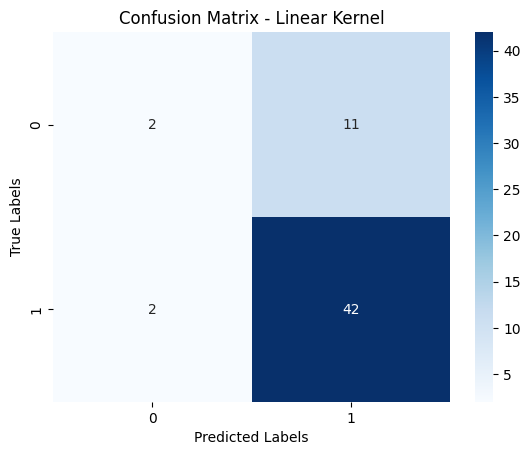



              precision    recall  f1-score   support

           1       0.50      0.15      0.24        13
           2       0.79      0.95      0.87        44

    accuracy                           0.77        57
   macro avg       0.65      0.55      0.55        57
weighted avg       0.73      0.77      0.72        57



In [23]:
clflinear = SVC(kernel='linear',C=30, probability=True)
clflinear.fit(X_train, y_train)
y_pred_linear = clflinear.predict(X_test)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(conf_matrix_linear, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Linear Kernel")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('\n')
print(classification_report(y_test, y_pred_linear))
importances = clflinear.coef_

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

pcadata = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
X = pcadata.copy()
y1 = df['status'].to_numpy()

x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Use the trained model to classify each point in the meshgrid
rbfsvm = SVC(kernel='linear', C=10, probability=True)
rbfsvm.fit(X, y1)  # Use y1 as the target variable
Z = rbfsvm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the training points
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y1, s=20, edgecolor='k', cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('SVM Decision Boundary with Linear Kernel')
plt.legend(*scatter.legend_elements(), title='Classes')  # Add legend
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
#RBF Kernel

Feature  Patient_ID  :  0.0
Feature  inst  :  0.0
Feature  time  :  0.0
Feature  status  :  0.0
Feature  age  :  0.0
Feature  sex  :  0.0


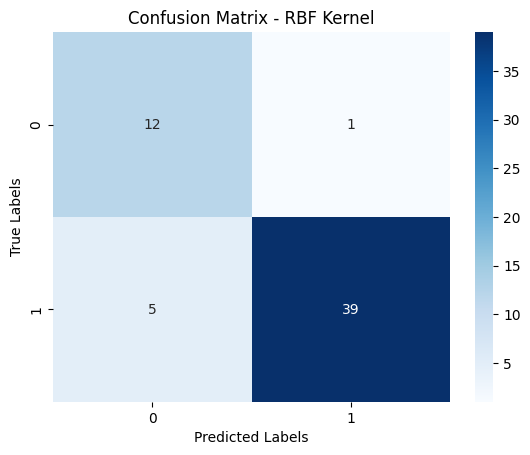



              precision    recall  f1-score   support

           1       0.71      0.92      0.80        13
           2       0.97      0.89      0.93        44

    accuracy                           0.89        57
   macro avg       0.84      0.90      0.86        57
weighted avg       0.91      0.89      0.90        57



In [ ]:
for i in range(importances.shape[0]):
    print("Feature ",df.columns[i], " : ", importances[i])

clfrbf = SVC(kernel='rbf', C=30, probability=True)
clfrbf.fit(X_train, y_train)
y_pred_rbf = clfrbf.predict(X_test)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
# Visualize confusion matrix
sns.heatmap(conf_matrix_rbf, annot=True, cmap="Blues")
plt.title("Confusion Matrix - RBF Kernel")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('\n')
print(classification_report(y_test, y_pred_rbf))

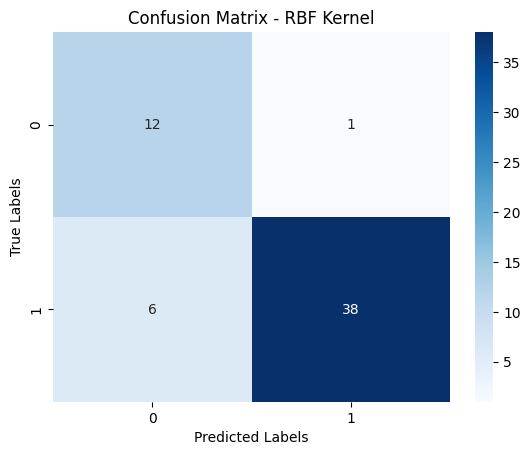



              precision    recall  f1-score   support

           1       0.67      0.92      0.77        13
           2       0.97      0.86      0.92        44

    accuracy                           0.88        57
   macro avg       0.82      0.89      0.84        57
weighted avg       0.90      0.88      0.88        57



In [ ]:
clfrbf = SVC(kernel='rbf', C=20, probability=True)
clfrbf.fit(X_train, y_train)
y_pred_rbf = clfrbf.predict(X_test)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
# Visualize confusion matrix
sns.heatmap(conf_matrix_rbf, annot=True, cmap="Blues")
plt.title("Confusion Matrix - RBF Kernel")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('\n')
print(classification_report(y_test, y_pred_rbf))

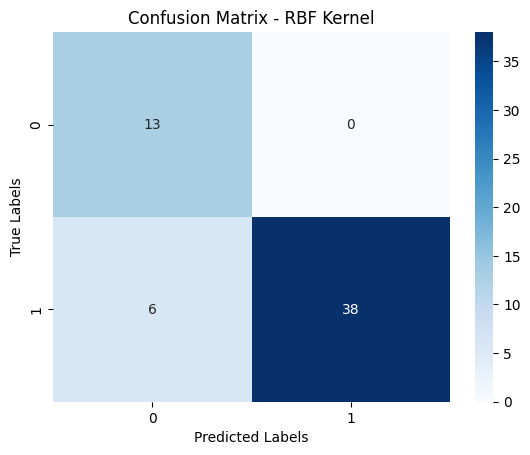



              precision    recall  f1-score   support

           1       0.68      1.00      0.81        13
           2       1.00      0.86      0.93        44

    accuracy                           0.89        57
   macro avg       0.84      0.93      0.87        57
weighted avg       0.93      0.89      0.90        57



In [42]:
clfrbf = SVC(kernel='rbf', C=10, probability=True)
clfrbf.fit(X_train, y_train)
y_pred_rbf = clfrbf.predict(X_test)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
# Visualize confusion matrix
sns.heatmap(conf_matrix_rbf, annot=True, cmap="Blues")
plt.title("Confusion Matrix - RBF Kernel")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('\n')
print(classification_report(y_test, y_pred_rbf))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

pcadata = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
X = pcadata.copy()
y1 = df['status'].to_numpy()

x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Use the trained model to classify each point in the meshgrid
rbfsvm = SVC(kernel='rbf', C=10, probability=True)
rbfsvm.fit(X, y1)  # Use y1 as the target variable
Z = rbfsvm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the training points
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y1, s=20, edgecolor='k', cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('SVM Decision Boundary with RBF Kernel')
plt.legend(*scatter.legend_elements(), title='Classes')  # Add legend
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
#Polynomial Kernel

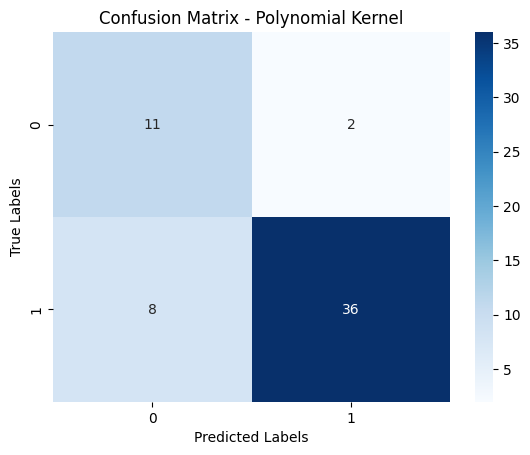



              precision    recall  f1-score   support

           1       0.58      0.85      0.69        13
           2       0.95      0.82      0.88        44

    accuracy                           0.82        57
   macro avg       0.76      0.83      0.78        57
weighted avg       0.86      0.82      0.83        57



In [43]:
clfpoly = SVC(kernel='poly', degree=3, C=30, probability=True)
clfpoly.fit(X_train, y_train)
y_pred_poly = clfpoly.predict(X_test)
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly)
# Visualize confusion matrix
sns.heatmap(conf_matrix_poly, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Polynomial Kernel")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('\n')
print(classification_report(y_test, y_pred_poly))
from sklearn.inspection import permutation_importance
result = permutation_importance(clfpoly, X, y, n_repeats=10, random_state=0)
importances = result.importances_mean

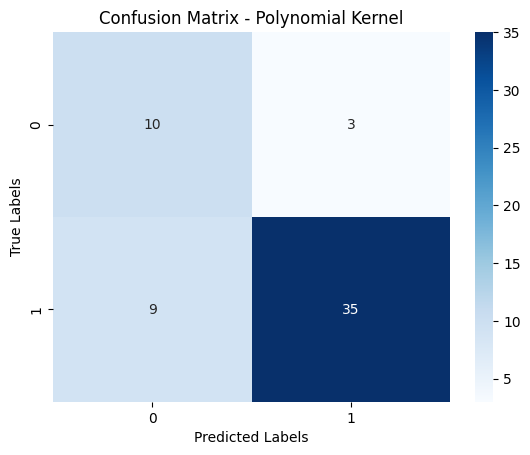



              precision    recall  f1-score   support

           1       0.53      0.77      0.62        13
           2       0.92      0.80      0.85        44

    accuracy                           0.79        57
   macro avg       0.72      0.78      0.74        57
weighted avg       0.83      0.79      0.80        57



In [ ]:
clfpoly = SVC(kernel='poly', degree=3, C=20, probability=True)
clfpoly.fit(X_train, y_train)
y_pred_poly = clfpoly.predict(X_test)
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly)
# Visualize confusion matrix
sns.heatmap(conf_matrix_poly, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Polynomial Kernel")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('\n')
print(classification_report(y_test, y_pred_poly))
from sklearn.inspection import permutation_importance
result = permutation_importance(clfpoly, X, y, n_repeats=10, random_state=0)
importances = result.importances_mean

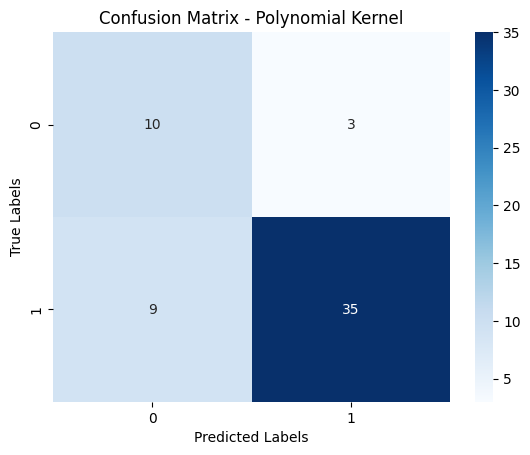



              precision    recall  f1-score   support

           1       0.53      0.77      0.62        13
           2       0.92      0.80      0.85        44

    accuracy                           0.79        57
   macro avg       0.72      0.78      0.74        57
weighted avg       0.83      0.79      0.80        57



In [31]:
clfpoly = SVC(kernel='poly', degree=3, C=10, probability=True)
clfpoly.fit(X_train, y_train)
y_pred_poly = clfpoly.predict(X_test)
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly)
# Visualize confusion matrix
sns.heatmap(conf_matrix_poly, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Polynomial Kernel")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('\n')
print(classification_report(y_test, y_pred_poly))
from sklearn.inspection import permutation_importance
result = permutation_importance(clfpoly, X, y, n_repeats=10, random_state=0)
importances = result.importances_mean

In [ ]:
for i in range(importances.shape[0]):
    print("Feature ",df.columns[i], " : ", importances[i])

#!pip install --upgrade matplotlib

Feature  Patient_ID  :  0.1903508771929824
Feature  inst  :  -0.003070175438596512
Feature  time  :  0.07543859649122804
Feature  status  :  -0.011842105263157932
Feature  age  :  0.0
Feature  sex  :  0.0
Feature  ph.ecog  :  -0.007894736842105298
Feature  ph.karno  :  -0.0052631578947368585
Feature  pat.karno  :  0.00043859649122802714
Feature  meal.cal  :  -0.007456140350877239


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

pcadata = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
X = pcadata.copy()
y1 = df['status'].to_numpy()

x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Use the trained model to classify each point in the meshgrid
rbfsvm = SVC(kernel='poly', C=10, probability=True)
rbfsvm.fit(X, y1)  # Use y1 as the target variable
Z = rbfsvm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the training points
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y1, s=20, edgecolor='k', cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('SVM Decision Boundary with Polynomial Kernel')
plt.legend(*scatter.legend_elements(), title='Classes')  # Add legend
plt.show()
